In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
 pip install xgboost

  Using cached xgboost-1.7.3-py3-none-win_amd64.whl (89.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("C://Users//nagamytreya//Downloads//water_potability.csv")
df.drop(3014, inplace=True)
df.tail(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3256,7.607224,160.565253,39184.846720,7.826411,312.056066,503.158079,13.366994,62.022308,3.525027,1
3257,6.683368,272.111698,18989.316768,5.336202,336.555100,307.725009,20.178716,75.402260,5.208061,1
3258,6.638411,180.826667,9772.504814,8.295983,NaN,401.111143,12.601517,61.051889,5.164057,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1
3260,NaN,134.736856,9000.025591,9.026293,NaN,428.213987,8.668672,74.773392,3.699558,1
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1
3262,8.378108,198.511213,28474.202580,6.477057,319.477187,499.866994,15.389083,35.221200,4.524693,1
3263,6.923636,260.593154,24792.525623,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1


C:\Users\nagamytreya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

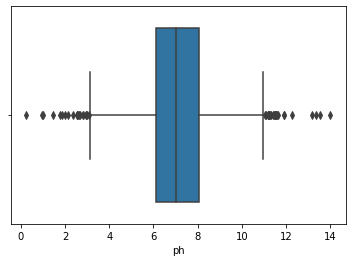

In [3]:
sns.boxplot(df['ph'])


In [4]:
dfr=df[df['Potability']==1]
dfr['Potability']

250     1
251     1
252     1
253     1
254     1
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 1278, dtype: int64

In [5]:
dfl=df[df['Potability']==0]
dfno=df.dropna()
cols=list(dfr.columns)

In [6]:
def change(water_right,column, upper_limit,lis,lower_limit):
    for i in range(len(water_right)):
        print(water_right.iloc[i:i+1][column].values)
        x = water_right.iloc[i:i+1][column].values[0]
        if (x> upper_limit):
            lis[i] = 0
        if(column=='ph'):
            if(x<lower_limit):
                lis[i] = 0
    return lis

In [7]:
for_df = []

In [8]:
lis = dfr['Potability'].values
# lis1 = dfr['Potability'].values
for i in cols:
    perc25 = dfr[i].quantile(0.25)
    perc75 = dfr[i].quantile(0.75)
    iqr = perc75 - perc25
    upper_limit = perc75 + 1.5* iqr
    lower_limit = perc25 - 1.5 * iqr
    lis = change(dfr,i,upper_limit, lis, lower_limit)
print(lis)


[9.44512984]
[9.02484504]
[nan]
[6.80011909]
[7.17413516]
[7.65799124]
[8.32298667]
[5.93427909]
[9.80272078]
[6.10195523]
[4.9977706]
[4.81576679]
[6.54802056]
[13.17540172]
[6.61801091]
[7.78805473]
[5.19183433]
[5.62633953]
[6.86963894]
[9.05862842]
[7.29188833]
[7.27590877]
[6.51273712]
[7.20788678]
[nan]
[5.32494186]
[7.08230065]
[5.33418358]
[10.7618978]
[6.28680695]
[9.7945587]
[8.21044357]
[6.94171944]
[10.35611883]
[7.95898429]
[3.88263108]
[5.67177383]
[10.00330054]
[6.55284747]
[7.62855272]
[4.79084054]
[7.71095994]
[8.29129901]
[6.1931701]
[9.03266058]
[6.13949374]
[7.12942473]
[nan]
[5.41850376]
[8.07549451]
[nan]
[10.04967372]
[5.66765065]
[nan]
[8.92398061]
[6.42886631]
[6.9606035]
[5.87367585]
[6.79546901]
[10.04102797]
[nan]
[7.29603773]
[nan]
[5.86264123]
[7.29214181]
[8.06280564]
[7.82197094]
[11.301794]
[6.59376431]
[9.16108861]
[nan]
[4.64295305]
[7.79845368]
[5.56434249]
[7.88659123]
[7.44318901]
[3.65712313]
[9.59719186]
[6.96422594]
[7.67290952]
[6.73700407]
[na

[8.07726089]
[6.68209736]
[4.73132008]
[9.24141997]
[5.62831327]
[4.85780262]
[8.43047166]
[6.81760838]
[5.91375532]
[nan]
[5.50027658]
[5.60862315]
[5.60923536]
[nan]
[5.8598221]
[6.41771605]
[6.17052614]
[4.03406341]
[4.97946881]
[8.09745377]
[nan]
[8.46874106]
[7.87085341]
[7.6795951]
[7.22659271]
[nan]
[8.65911303]
[nan]
[6.36019582]
[10.48560365]
[6.60341652]
[5.71332292]
[4.76747245]
[9.60983436]
[9.18645338]
[9.96068986]
[6.10230679]
[6.7926551]
[5.91053974]
[6.12581033]
[5.83610453]
[nan]
[10.66736393]
[8.62830107]
[6.26011129]
[10.80815694]
[7.37191416]
[4.82559146]
[4.86882714]
[7.39545085]
[8.86211271]
[6.00897361]
[7.60722391]
[6.6833677]
[6.63841145]
[9.27135545]
[nan]
[3.62992206]
[8.37810802]
[6.92363601]
[5.89310341]
[8.19735337]
[8.37291028]
[8.98990009]
[6.70254655]
[11.49101091]
[6.06961576]
[4.66810169]
[7.80885602]
[9.41951032]
[5.12676292]
[7.87467136]
[145.80540245]
[128.09669121]
[169.97484896]
[242.00808151]
[203.40893462]
[236.96088925]
[207.25246223]
[223.858

[203.70722162]
[192.52170325]
[171.75175404]
[208.32602177]
[166.91399144]
[204.7242814]
[181.52538979]
[215.67378607]
[246.62287105]
[158.20764744]
[225.08855451]
[129.24008062]
[237.26950481]
[215.4406413]
[169.92622161]
[190.56752125]
[195.54096692]
[283.99728408]
[231.32279668]
[121.57513923]
[187.0432834]
[199.42503765]
[219.34293247]
[185.41507666]
[197.60207771]
[228.59039233]
[184.55858174]
[180.79555813]
[263.85767541]
[167.82331532]
[213.42826944]
[231.44505428]
[180.29090762]
[198.02109508]
[186.72263123]
[190.89742112]
[225.06310278]
[193.16250085]
[163.92724188]
[155.61611241]
[215.44520444]
[216.64706818]
[248.90471158]
[179.30238137]
[175.33723954]
[186.06060348]
[173.00833849]
[203.3961302]
[200.70550533]
[157.66691751]
[218.61969926]
[228.75681901]
[274.351887]
[156.1108292]
[160.96260284]
[163.40981924]
[249.16356688]
[135.25927247]
[150.77572348]
[183.07135491]
[190.87746978]
[194.85899989]
[164.76890147]
[167.38535324]
[191.6651832]
[211.08650295]
[154.13757917]
[18

[258.44726517]
[232.94323834]
[233.76157881]
[184.32869275]
[155.70967941]
[215.94069523]
[215.85486927]
[249.96924348]
[153.74817023]
[232.93119602]
[185.90930282]
[207.36190665]
[161.19528296]
[197.66094852]
[186.98686936]
[240.61151665]
[188.71163652]
[163.09825445]
[242.82758824]
[216.56470196]
[125.97518527]
[186.83802793]
[214.59368488]
[183.91529618]
[183.61412124]
[130.37427186]
[132.6703047]
[223.70496559]
[241.28632308]
[231.01878382]
[160.77435345]
[139.16974357]
[185.42172373]
[176.80866081]
[184.3851244]
[240.88714438]
[186.67049594]
[153.56973841]
[169.5785262]
[236.03478265]
[222.04263117]
[164.16816645]
[151.45483069]
[157.71936436]
[149.76874388]
[225.67487156]
[228.52483859]
[142.1478106]
[219.58643987]
[175.01508264]
[193.0420805]
[202.71550105]
[198.28626838]
[185.83867135]
[125.15876981]
[180.45387129]
[219.51988565]
[94.90897713]
[119.02821549]
[191.9168989]
[197.22206644]
[213.00244111]
[151.57377799]
[234.80095696]
[110.90359775]
[184.99369844]
[173.73933013]
[2

[22543.25629245]
[8746.90171712]
[30211.83299086]
[10117.08443808]
[30579.37106659]
[33337.10964943]
[15171.01232567]
[30606.22359321]
[15380.12407914]
[19862.8112574]
[20134.39834067]
[27008.01187447]
[20339.0168699]
[31620.19078558]
[25972.8037506]
[34585.08960695]
[22781.36453357]
[32768.22796618]
[15661.94033504]
[23072.78069828]
[13492.84083503]
[12760.4371508]
[13580.61848289]
[32150.97939283]
[18085.15884118]
[15736.5809855]
[22523.43356997]
[25107.2086298]
[16351.22628668]
[6974.22513483]
[13593.60001792]
[31369.54164078]
[20243.08819511]
[35381.67075872]
[32595.12024352]
[15426.91507877]
[28508.21692861]
[8524.87464557]
[11610.20794869]
[23688.20522331]
[21776.17017449]
[39624.08717907]
[11598.68236707]
[16559.8772622]
[18113.01730237]
[16078.45938621]
[16616.51661654]
[24259.75166947]
[37215.22683519]
[26955.33018271]
[22807.33885145]
[15255.11525796]
[19789.63607998]
[22337.44839297]
[26845.66101348]
[13776.62179177]
[21111.66410412]
[21217.15859557]
[20287.35977042]
[18664.

[35273.97622923]
[22445.17330313]
[39659.87689806]
[29706.23422427]
[23978.10768273]
[38886.38767862]
[12352.81110513]
[13394.73160748]
[14110.92096799]
[32156.81943895]
[29772.01924745]
[26951.86265308]
[14812.9706448]
[31321.08242631]
[15761.87136628]
[16828.8805967]
[23495.30748331]
[21314.86978931]
[40611.7133192]
[12215.4090826]
[15040.84147766]
[25795.69363512]
[27414.89912294]
[17505.85273517]
[19015.46827487]
[17947.98811364]
[16679.67362203]
[26730.63533388]
[30037.22162465]
[18465.26504172]
[21021.41825917]
[17181.00881368]
[24497.87393521]
[17176.87895065]
[27417.9980429]
[15379.9127629]
[9929.19480986]
[9975.60133395]
[16701.56597534]
[17605.53575903]
[12833.46124108]
[24456.1748881]
[16129.70692329]
[6193.33056232]
[25498.32953988]
[8729.09621746]
[16780.11614683]
[17977.52564892]
[30610.04790042]
[10171.71010333]
[9887.83075453]
[22057.05178618]
[50793.89891687]
[15338.06164117]
[34558.40266735]
[34355.61842683]
[15904.24335896]
[27198.43259077]
[16700.03487256]
[20006.22

[7.53219197]
[7.4432432]
[7.96452512]
[7.78474991]
[4.21971053]
[6.43318389]
[9.71690813]
[5.88555748]
[8.4420336]
[4.24282891]
[11.14310959]
[4.14332938]
[6.16462129]
[5.68775493]
[9.11248462]
[9.98272354]
[5.30707088]
[7.57135994]
[9.79699952]
[7.41540553]
[7.22471017]
[7.42120991]
[5.66265725]
[9.01033222]
[4.79236101]
[8.02658633]
[3.30897734]
[5.43877643]
[7.83327496]
[5.56804205]
[6.66147387]
[8.11195809]
[7.97773012]
[4.71657651]
[6.03286391]
[7.06508374]
[8.41789573]
[6.5873023]
[5.33012305]
[6.30968517]
[7.00943706]
[5.89227267]
[6.55926511]
[8.07661305]
[7.36241088]
[8.93396614]
[4.95127705]
[6.87835426]
[8.06469307]
[6.5366798]
[7.83888417]
[9.81246842]
[6.45623848]
[6.21894845]
[7.09947438]
[4.74011074]
[7.57243547]
[8.73175118]
[6.81141552]
[9.4697635]
[7.87006154]
[7.00348767]
[6.2782927]
[5.40835395]
[8.05364201]
[8.87701059]
[8.31907989]
[7.65213513]
[6.35293353]
[7.36050447]
[7.40801754]
[6.77275338]
[7.38925961]
[7.59768757]
[7.8565569]
[6.86796363]
[7.67371902]
[5.92

[278.74229638]
[366.87150202]
[375.14731476]
[432.55638496]
[360.66825905]
[323.10928514]
[nan]
[279.77685655]
[343.23397698]
[247.33541193]
[293.30985366]
[192.03359168]
[320.10217263]
[352.35343089]
[180.20674636]
[350.40184898]
[nan]
[318.42724085]
[328.68064963]
[291.98008348]
[243.48594183]
[nan]
[327.92275105]
[259.97996617]
[nan]
[nan]
[nan]
[274.9043512]
[255.04319358]
[377.24116134]
[390.59639198]
[275.76732107]
[nan]
[372.9274557]
[nan]
[312.98272671]
[355.48876584]
[nan]
[298.73721929]
[377.12897044]
[323.50807201]
[293.57424991]
[298.2267188]
[nan]
[nan]
[nan]
[nan]
[316.95693448]
[363.8668902]
[233.79258797]
[377.19066571]
[350.4309403]
[412.69011135]
[259.16496517]
[nan]
[324.85165866]
[337.5012466]
[nan]
[343.28923404]
[353.60727541]
[nan]
[258.19118415]
[329.33836638]
[281.70077681]
[nan]
[nan]
[346.07501581]
[321.25089808]
[343.43901731]
[nan]
[296.19026162]
[397.70006501]
[262.0645514]
[377.35804842]
[385.40265949]
[nan]
[nan]
[347.8165145]
[289.95995286]
[373.9917105

[326.11535022]
[430.48729571]
[426.23112913]
[335.19760825]
[378.08554563]
[401.14087862]
[384.30867302]
[463.74171617]
[551.47620223]
[412.70942338]
[559.81784714]
[388.46726597]
[278.63903868]
[309.25461974]
[469.79537505]
[440.28344557]
[558.81556674]
[487.99726163]
[695.36952799]
[447.02807684]
[383.20777481]
[492.4115244]
[330.06737897]
[514.76291846]
[498.65083271]
[497.01923447]
[425.7520176]
[479.79197473]
[409.45099774]
[328.43311026]
[521.14052365]
[502.99108784]
[543.52879861]
[441.52954725]
[356.86228712]
[518.37557261]
[350.17803981]
[402.59360203]
[349.18608549]
[607.02654232]
[429.82781891]
[444.85432083]
[401.20427095]
[265.25119864]
[459.87654965]
[395.40700382]
[351.16121324]
[406.80630235]
[307.69136061]
[440.938978]
[532.3366593]
[604.6312629]
[446.45072534]
[390.95503298]
[314.96508973]
[458.67723149]
[386.62286249]
[296.07438205]
[465.55928583]
[327.4756504]
[369.59128907]
[517.93578552]
[384.68487541]
[503.66408514]
[473.75130164]
[358.04413002]
[393.88961561]
[4

[475.6460515]
[501.34534699]
[458.99293585]
[475.3323571]
[471.47741904]
[473.06482361]
[407.72161328]
[419.30498022]
[512.23230641]
[496.36356153]
[359.97443658]
[534.1669972]
[357.35856661]
[442.54359948]
[375.41147006]
[274.69654008]
[454.55520783]
[348.97139489]
[424.00349933]
[635.88848406]
[432.03070991]
[367.04437911]
[510.02972476]
[395.73863058]
[582.11060558]
[257.00771769]
[295.67513663]
[374.54306859]
[485.3119536]
[201.61973676]
[493.17941656]
[456.53001893]
[580.09522456]
[323.88545375]
[377.64934393]
[522.80139848]
[568.42056788]
[347.21945676]
[344.39891161]
[324.42777202]
[448.23463973]
[332.06882507]
[612.09492568]
[355.9372383]
[392.43337703]
[489.74534642]
[373.54821453]
[515.7549359]
[405.48550994]
[400.45126841]
[403.82400266]
[299.88699663]
[478.89361568]
[336.9129341]
[270.05539381]
[388.74550152]
[474.98977327]
[420.83086635]
[431.16746753]
[494.94553706]
[549.98731764]
[446.87914867]
[370.27462103]
[300.35897201]
[452.30604162]
[303.49637343]
[339.34474008]
[5

[15.90098505]
[15.49560337]
[15.0086742]
[12.89704926]
[15.31397775]
[17.18796335]
[12.63608646]
[17.53070356]
[10.68067274]
[10.43033979]
[15.48527563]
[10.42915946]
[13.91876862]
[13.65110537]
[16.21914102]
[18.18983851]
[12.72192188]
[13.27027883]
[14.7925852]
[18.41518046]
[16.45099005]
[14.73229122]
[8.95640146]
[9.90132763]
[14.97119882]
[20.38671963]
[15.67156353]
[13.2019432]
[14.22175704]
[16.38314048]
[13.98356664]
[13.91093319]
[19.44259882]
[8.12979265]
[16.58112044]
[8.71396362]
[14.8415799]
[18.74323079]
[16.62562738]
[14.68592683]
[17.70572731]
[16.89575368]
[7.76085257]
[7.91815034]
[12.27318065]
[11.68712384]
[12.83064631]
[16.12752714]
[14.37633691]
[6.00039093]
[12.78526531]
[13.26328179]
[11.85907432]
[8.00801142]
[8.85770553]
[9.99939782]
[14.92917215]
[14.6893506]
[15.02708758]
[8.58989553]
[12.841611]
[16.10916917]
[10.10514594]
[7.81781164]
[10.43961937]
[16.00671093]
[21.22812724]
[21.49786644]
[9.77189594]
[17.07312308]
[13.99084222]
[14.83425698]
[12.30010681

[18.08100298]
[11.46282496]
[15.67420954]
[12.36029198]
[11.80500517]
[15.68282106]
[12.6828689]
[21.23789913]
[18.43783528]
[12.12095586]
[14.33539517]
[10.09208706]
[11.81485238]
[17.88359172]
[18.45395077]
[22.13995838]
[15.48537787]
[13.26114311]
[13.05589446]
[16.63547599]
[15.17466373]
[16.33142148]
[15.72546712]
[17.21245507]
[21.1420528]
[13.07600748]
[13.24699548]
[11.75304576]
[14.96653219]
[11.2609135]
[11.01054457]
[14.20055722]
[11.45520341]
[16.08864827]
[15.20869109]
[13.78726396]
[14.64668497]
[13.77822566]
[13.71580437]
[9.06444502]
[16.9261748]
[16.71005608]
[15.91660513]
[18.22874853]
[19.67616855]
[15.22002138]
[13.1727213]
[11.48218662]
[13.61140839]
[15.67120307]
[11.83169084]
[21.91737699]
[10.39293652]
[17.54842473]
[17.72838904]
[16.16205859]
[21.88708769]
[14.31938421]
[10.67551753]
[15.43451342]
[13.80007075]
[14.69784453]
[12.58704787]
[11.65039339]
[18.72285989]
[14.17390623]
[16.55717663]
[13.83627998]
[13.13491663]
[17.48681507]
[18.2858821]
[12.40591315]

[59.52166408]
[95.30623862]
[76.53880284]
[58.41669861]
[93.78437986]
[45.98162418]
[68.86186085]
[51.27471187]
[64.50592258]
[83.23866139]
[17.00068293]
[79.86300941]
[nan]
[85.93042839]
[72.60807608]
[58.10070667]
[108.84956803]
[65.54821586]
[63.72293291]
[59.88736706]
[50.89523315]
[99.17559467]
[49.29984943]
[68.89560275]
[81.37845107]
[73.94096997]
[29.66814213]
[93.71487616]
[61.12507973]
[73.72307012]
[46.68259729]
[70.16838922]
[81.59236188]
[77.28655067]
[73.11505279]
[74.67438321]
[102.56784617]
[82.58133835]
[68.6407682]
[43.18880258]
[78.50149245]
[67.53326015]
[43.44064402]
[nan]
[77.83403618]
[65.15518183]
[70.57141441]
[105.40046038]
[82.92934548]
[72.36321679]
[72.29966228]
[57.345645]
[68.99274058]
[54.21628416]
[80.33833076]
[74.41286716]
[73.16477755]
[42.84451085]
[8.57701293]
[82.78192571]
[49.4804408]
[67.49345]
[75.32889227]
[55.49833107]
[79.96280267]
[nan]
[63.85767375]
[41.29033047]
[60.29218733]
[59.68607582]
[62.03773024]
[nan]
[79.53836758]
[55.58681501]
[

[82.49259499]
[52.15778717]
[77.22700303]
[62.74338338]
[57.53065851]
[84.25426404]
[52.95002327]
[103.38020998]
[62.32004847]
[68.23338555]
[76.64573393]
[64.36379306]
[60.52159304]
[50.65500083]
[69.39441775]
[55.89391551]
[81.28838221]
[78.50227064]
[69.41228382]
[57.20308922]
[79.39400835]
[72.09361001]
[66.73504403]
[71.9838514]
[84.31540019]
[69.99012794]
[78.58753831]
[63.82601002]
[58.17625506]
[46.65542923]
[101.4668252]
[77.53204198]
[61.15932665]
[67.16981627]
[75.8861599]
[68.59982979]
[52.11270716]
[78.87860429]
[61.51434191]
[65.78245304]
[64.36111583]
[92.34737526]
[nan]
[72.91730528]
[77.29730019]
[43.59230116]
[98.36782478]
[67.40067335]
[69.72391203]
[60.34389091]
[59.00066632]
[79.78046694]
[82.78535241]
[52.38884926]
[97.03045734]
[65.0766099]
[81.55160971]
[50.21401089]
[44.7503592]
[71.47850077]
[66.60889106]
[62.15231453]
[83.18441419]
[43.95331343]
[67.59815754]
[nan]
[82.24409483]
[51.6978938]
[60.94002778]
[46.04628652]
[56.43748499]
[62.23013405]
[43.42019517

[3.61918185]
[3.15276279]
[5.34921059]
[3.57460516]
[4.30217928]
[4.20157725]
[2.74580376]
[2.89101888]
[4.98987617]
[4.12082788]
[4.1345752]
[3.49506299]
[4.6006634]
[2.64024641]
[3.36282176]
[4.58597168]
[2.72556495]
[3.57965184]
[4.89205044]
[3.32738443]
[4.52676833]
[3.80281964]
[3.02138156]
[3.45343888]
[3.43827984]
[5.25648355]
[4.48651269]
[2.89099852]
[4.6013512]
[3.8466119]
[4.01901055]
[3.93733418]
[5.42737266]
[4.64569167]
[3.71636755]
[3.59421736]
[3.39213417]
[4.37188244]
[4.70967603]
[4.11626325]
[3.63997188]
[3.18902554]
[4.18126411]
[1.49220662]
[4.55050101]
[3.93191655]
[3.30157489]
[4.27669907]
[3.60304046]
[4.30554936]
[4.70047023]
[5.12839005]
[4.27519272]
[4.53192078]
[4.25187617]
[4.48987047]
[4.89321527]
[5.60929081]
[3.46385244]
[3.37393651]
[4.24113518]
[3.99024263]
[4.93555654]
[4.59052765]
[2.919796]
[2.65884341]
[4.59378713]
[5.32001546]
[4.49374677]
[3.5999331]
[3.82743141]
[3.87029278]
[3.53138466]
[2.52601624]
[5.0758436]
[3.51580255]
[6.07300601]
[2.9499

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [9]:
for i in range(len(cols)-1):
    for_df.append(dfr[cols[i]].values)


In [10]:
Df = pd.DataFrame()

In [11]:
for i in cols:
    Df[i] = dfr[i]
Df['Potability'] = lis
Df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,0
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
final_df=pd.concat([dfl, Df])

In [13]:
fdf1=final_df[final_df['Potability']==1]
fdf2=final_df[final_df['Potability']==0]

In [14]:
df1 = Df.dropna()
df2=df1[df1['Potability']==1]

In [15]:
for i in cols:
    fdf1[i].fillna(df2[i].mean(), inplace = True)

C:\Users\nagamytreya\AppData\Local\Temp\ipykernel_13864\3116846447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[i].fillna(df2[i].mean(), inplace = True)


In [16]:
fdf1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.085586,169.974849,23403.637304,8.519730,333.023122,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.023122,392.449580,19.903225,66.385034,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.023122,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.023122,402.883113,11.168946,77.488213,4.708658,1


In [17]:
for i in cols:
    cx = dfl[i].max()
    print(cx)
    fdf2[i].fillna(float(cx), inplace = True)

C:\Users\nagamytreya\AppData\Local\Temp\ipykernel_13864\1393506431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf2[i].fillna(float(cx), inplace = True)


13.999999999999998
304.23591211231667
61227.19600771213
12.653362021943142
460.1070689926536
753.3426195583046
28.30000000000001
120.03007700530677
6.739
0


In [18]:
fdf2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,14.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,460.107069,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,460.107069,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3236,4.767472,256.449917,48007.868134,5.773180,460.107069,590.429550,16.541561,44.938586,3.893378,0
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,0
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,0
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,0


In [19]:
px = PowerTransformer(method = 'box-cox')
x_trans = px.fit_transform(fdf1.iloc[:,:-1])
x1_trans = px.fit_transform(fdf2.iloc[:,:-1])

In [20]:
x_trans

array([[ 1.96559501, -1.4840184 , -1.04690907, ..., -1.68116289,
         0.71119408, -0.12468684],
       [ 1.62187244, -1.96243998, -0.16432863, ...,  0.16919205,
         0.45786728,  0.018845  ],
       [ 0.02690458, -0.79859671,  0.25724995, ..., -0.39533976,
        -1.00354784, -1.56605743],
       ...,
       [ 1.94466058, -0.62926697,  1.30941239, ..., -0.96314555,
         0.19872521, -0.8682041 ],
       [-1.60249649,  1.06502869, -1.21924068, ..., -0.92432208,
         0.70521108,  0.97283134],
       [ 0.67779758, -0.049797  , -0.4730304 , ...,  0.59254991,
         0.78647499, -2.10926128]])

In [21]:
lid = list(fdf1['Potability']) + list(fdf2['Potability'])

In [22]:
d1 = pd.DataFrame(x_trans, columns=cols[:-1])

In [23]:
d2 = pd.DataFrame(x1_trans, columns=cols[:-1])

In [24]:
fi1 = pd.concat([d1,d2],ignore_index=True)

In [25]:
fi1['Potability'] = lid

In [26]:
fi1


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.965595,-1.484018,-1.046909,1.491151,-0.569652,1.908821,-1.681163,0.711194,-0.124687,1
1,1.621872,-1.962440,-0.164329,0.536478,-0.824813,0.379427,0.169192,0.457867,0.018845,1
2,0.026905,-0.798597,0.257250,0.867589,-0.014852,0.662526,-0.395340,-1.003548,-1.566057,1
3,-0.209278,1.436249,1.897948,1.530359,-3.457672,-0.549119,-0.845408,0.457818,-0.151007,1
4,0.100087,0.205300,-0.098214,0.319732,-1.141748,-1.393757,0.096213,0.499514,-0.040345,1
...,...,...,...,...,...,...,...,...,...,...
3270,-1.282964,1.822573,2.404272,-0.856551,1.426552,1.895350,0.665741,-1.270177,-0.090394,0
3271,0.912218,-0.711642,0.807771,-0.020461,-1.493941,-1.902759,1.002838,-0.680532,0.216825,0
3272,0.951800,0.057330,0.874888,-0.850539,-0.949013,-0.507981,0.178526,-1.093870,0.503824,0
3273,1.138493,-3.105665,1.551890,1.357790,-1.865679,0.211267,0.556556,-1.477912,0.512311,0


In [27]:
x = fi1.iloc[:,:-1]
y = fi1['Potability']

In [40]:
# o=[]
# for i in range(1,100):
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=84)
logi = LogisticRegression()
logi.fit(x_train,y_train)
y_pred2=logi.predict(x_test)

acc=accuracy_score(y_test,y_pred2)
acc
# o.append(acc)
# print(max(o),o.index(max(o)))
    

0.6625954198473283

In [29]:
RFC = RandomForestClassifier()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(fi1.iloc[:,:-1],fi1['Potability'],test_size=0.2)
RFC.fit(x_train,y_train)
y_RFC = RFC.predict(x_test)
accuracy_score(y_test, y_RFC)

0.8625954198473282

In [31]:
import pickle
pickle_out=open("clsfr.pkl","wb")
pickle.dump(RFC,pickle_out)
pickle_out.close()

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       429
           1       0.76      0.88      0.81       226

    accuracy                           0.86       655
   macro avg       0.85      0.87      0.85       655
weighted avg       0.87      0.86      0.86       655

Accuracy: 0.8625954198473282


<AxesSubplot:>

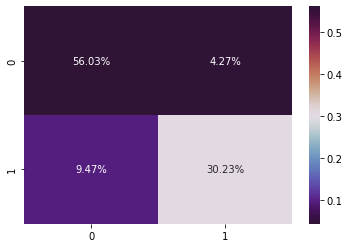

In [32]:
print(classification_report(y_RFC,y_test))
cmr= confusion_matrix(y_test,y_RFC)
Acc_rfc= accuracy_score(y_RFC,y_test)
print( 'Accuracy:',Acc_rfc)
sns.heatmap(cmr/np.sum(cmr), annot= True, fmt= '0.2%', cmap= 'twilight_shifted')


In [33]:
def fun(adf):
    fid = dict()
    for i in cols[:-1]:
        fid[i] = adf[cols.index(i)] 
    return fid

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
Xgb = XGBClassifier(max_depth=2,n_estimators=113)
Xgb.fit(x_train,y_train)
pred_Xgb =Xgb.predict(x_test)
Xgb_ACC = accuracy_score(y_test,pred_Xgb)
Xgb_ACC

0.8564885496183207

In [35]:
# l=[]
# for i in range(1,60):
#     x_train, x_test, y_train, y_test = train_test_split(fi1.iloc[:,:-1],fi1['Potability'], test_size = 0.2)
#     Xgb = XGBClassifier(max_depth=i, n_estimators = 113)
#     Xgb.fit(x_train,y_train)
#     y_pred = Xgb.predict(x_test)
#     c = float(accuracy_score(y_test,y_pred))
#     l.append(c)
# print(max(l),l.index(max(l)))

In [36]:
f = fun([4.767472,256.449917,48007.868134,5.773180,460.107069,590.429550,16.541561,44.938586,3.893378])
print(f)

{'ph': 4.767472, 'Hardness': 256.449917, 'Solids': 48007.868134, 'Chloramines': 5.77318, 'Sulfate': 460.107069, 'Conductivity': 590.42955, 'Organic_carbon': 16.541561, 'Trihalomethanes': 44.938586, 'Turbidity': 3.893378}


In [37]:
df1 = pd.DataFrame([[4.767472,256.449917,48007.868134,5.773180,460.107069,590.429550,16.541561,44.938586,3.893378]], columns = cols[:-1])
Xgb = XGBClassifier(max_depth=57, n_estimators = 230, n_jobs=1)
Xgb.fit(x_train,y_train)
Xgb.predict(df1)

array([1])

In [38]:
import pickle
pickle_out=open("clsfrxgb.pkl","wb")
pickle.dump(Xgb,pickle_out)
pickle_out.close()